In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# EDA

## One user data

In [31]:
df = pd.read_csv("../data/kaggle/train/data_1.csv")
df.describe()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
count,5667.000000,5667.000000,5667.000000,5667.000000,5667.000000,5667.000000,5667.000000,5667.000000
mean,13.959171,11.502493,10.236167,0.284101,0.143462,0.283395,0.289042,0.058938
std,4.155102,2.392718,1.207597,0.451025,0.350574,0.450686,0.453357,0.235529
min,7.101518,8.096167,5.191059,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.457467,9.603222,9.803476,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.873294,10.527197,10.326571,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.875835,13.525034,11.011404,1.000000,0.000000,1.000000,1.000000,0.000000
max,20.805985,17.127678,13.519284,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Sample Positional Sensor Data')

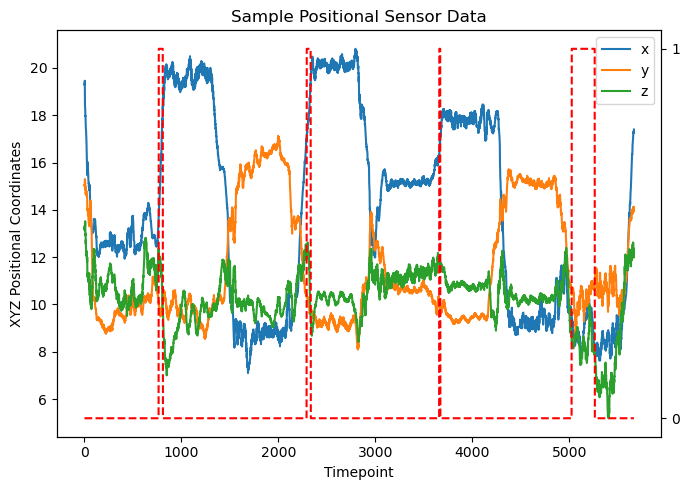

In [32]:
fig, ax = plt.subplots(figsize=(7, 5), layout='tight')
ax.plot(df['x'], label='x')
ax.plot(df['y'], label='y')
ax.plot(df['z'], label='z')

ax2 = ax.twinx()
ax2.plot(df['anomaly'], c='red', linestyle="dashed")
ax2.set_yticks([0, 1])

ax.set_ylabel('XYZ Positional Coordinates')
ax.set_xlabel('Timepoint')
ax.legend()
ax.set_title('Sample Positional Sensor Data')

Text(0.5, 1.0, 'Moving Average Denoised Positions')

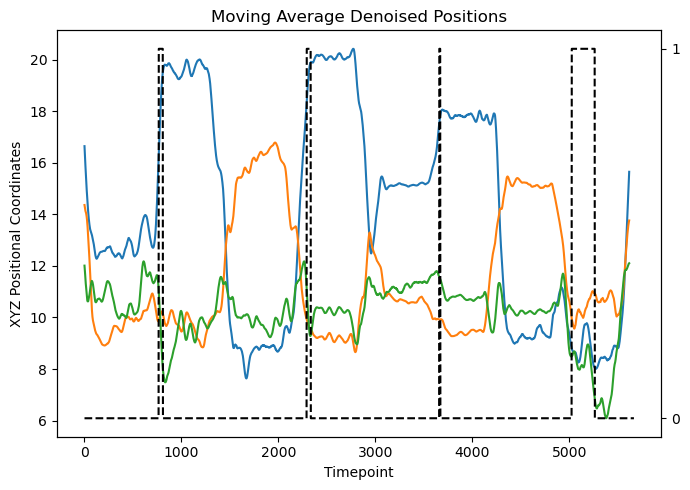

In [33]:
import numpy as np

window_width = 50
pos_x = np.cumsum(np.insert(df['x'], 0, 0))
ma_x_vec = (pos_x[window_width:] - pos_x[:-window_width])/window_width

pos_y = np.cumsum(np.insert(df['y'], 0, 0))
ma_y_vec = (pos_y[window_width:] - pos_y[:-window_width])/window_width

pos_z = np.cumsum(np.insert(df['z'], 0, 0))
ma_z_vec = (pos_z[window_width:] - pos_z[:-window_width])/window_width

pos_anom = np.cumsum(np.insert(df['z'], 0, 0))
ma_anom_vec = (pos_anom[window_width:] - pos_anom[:-window_width])/window_width


fig, ax = plt.subplots(figsize=(7, 5), layout='tight')

ax.plot(ma_x_vec, label='x')
ax.plot(ma_y_vec, label='y')
ax.plot(ma_z_vec, label='z')
ax2 = ax.twinx()
ax2.plot(df['anomaly'], c='black', linestyle="dashed")
ax2.set_yticks([0, 1])

ax.set_xlabel('Timepoint')
ax.set_ylabel('XYZ Positional Coordinates')
ax.set_title('Moving Average Denoised Positions')

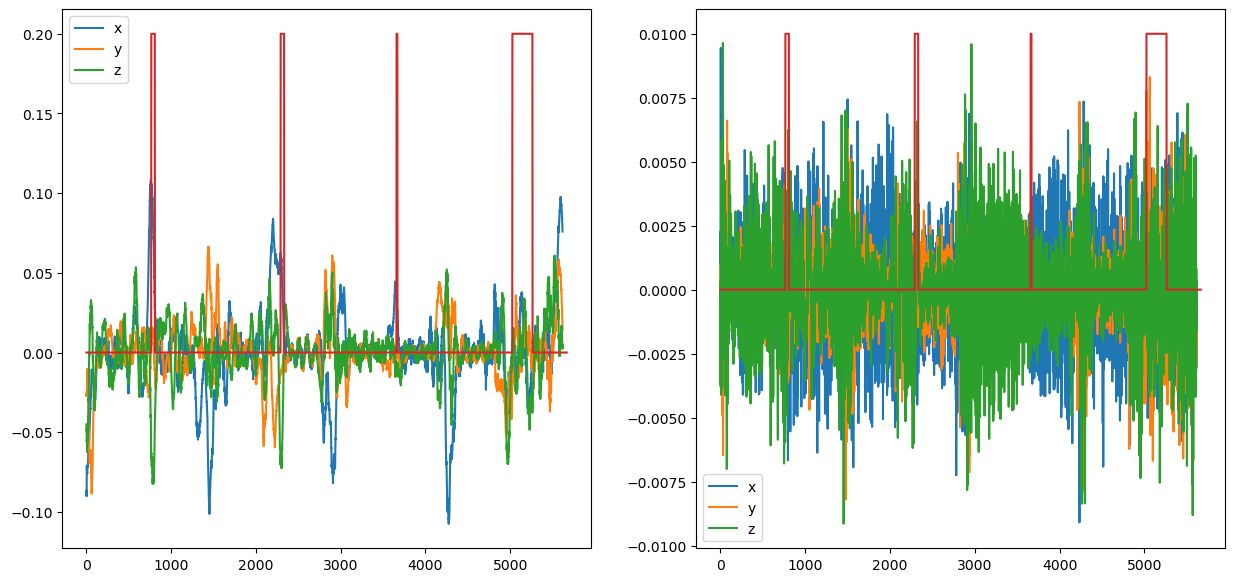

In [34]:
# grad_x = np.gradient(df['x'])
# grad_y = np.gradient(df['y'])
# grad_z = np.gradient(df['z'])

grad_x = np.gradient(ma_x_vec)
grad_y = np.gradient(ma_y_vec)
grad_z = np.gradient(ma_z_vec)
grad_anom = np.gradient(ma_anom_vec)

acc_x = np.gradient(grad_x)
acc_y = np.gradient(grad_y)
acc_z = np.gradient(grad_z)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].plot(grad_x, label='x')
ax[0].plot(grad_y, label='y')
ax[0].plot(grad_z, label='z')
ax[0].plot(df['anomaly'] * 0.2)

ax[1].plot(acc_x, label='x')
ax[1].plot(acc_y, label='y')
ax[1].plot(acc_z, label='z')
ax[1].plot(df['anomaly'] * 0.01)

ax[0].legend()
ax[1].legend()

/var/folders/s8/qqp2ns0n1zx5q35r256l57m40000gn/T/ipykernel_31362/1203367602.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


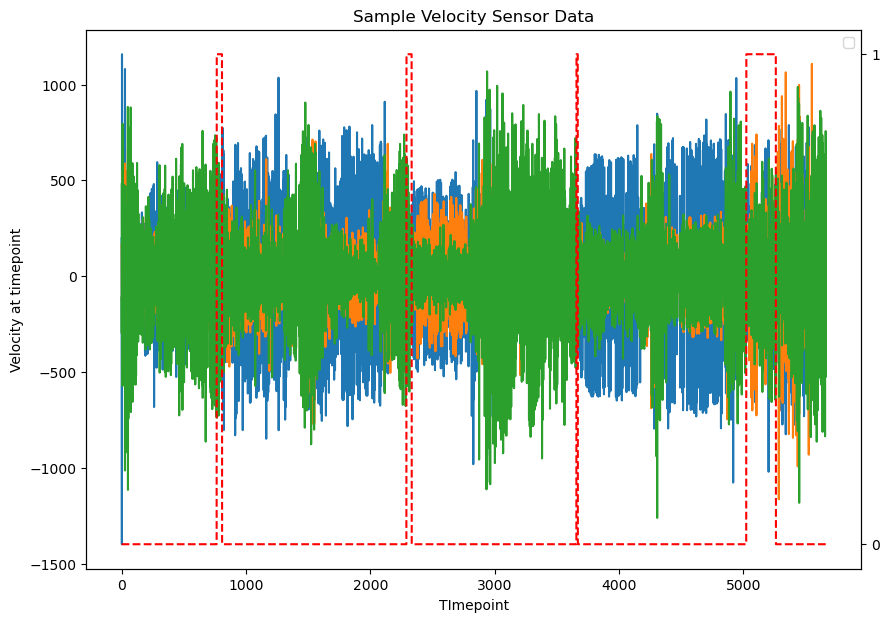

In [35]:
dt = 0.027
vel_x = np.diff(df['x'])/dt
vel_y = np.diff(df['y'])/dt
vel_z = np.diff(df['z'])/dt

acc_x = np.diff(vel_x)/dt
acc_y = np.diff(vel_y)/dt
acc_z = np.diff(vel_z)/dt

graddx = np.gradient(df['x'])

fig, ax = plt.subplots(figsize=(10,7))
# ax.plot(vel_x)
# ax.plot(vel_y)
# ax.plot(vel_z)

ax.plot(acc_x)
ax.plot(acc_y)
ax.plot(acc_z)


ax2 = ax.twinx()
ax2.plot(df['anomaly'], c='red', linestyle="dashed")
ax2.set_yticks([0, 1])

ax.set_xlabel('TImepoint')
ax.set_ylabel('Velocity at timepoint')
ax.set_title('Sample Velocity Sensor Data')
ax.legend()


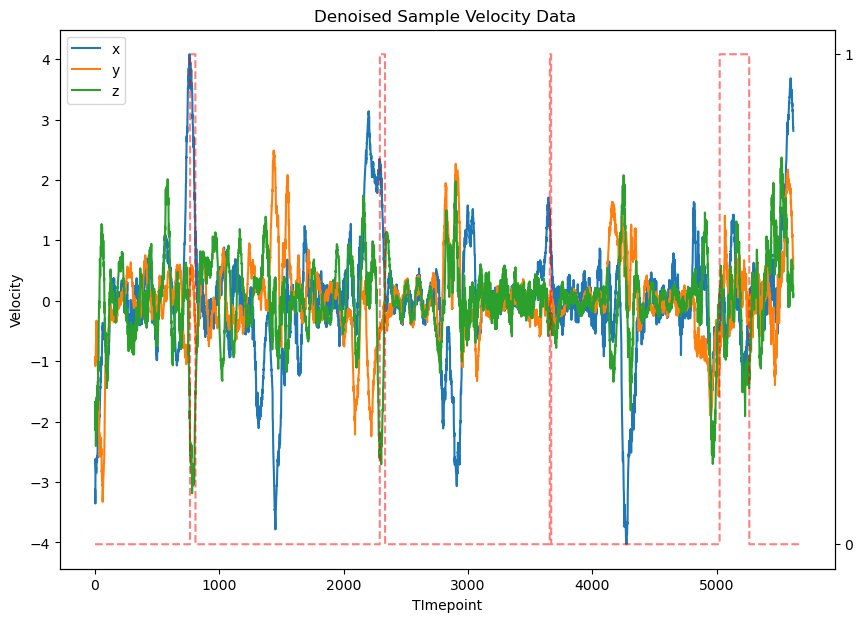

In [36]:
dvel_x = np.diff(ma_x_vec)/dt
dvel_y = np.diff(ma_y_vec)/dt
dvel_z = np.diff(ma_z_vec)/dt

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(dvel_x, label='x')
ax.plot(dvel_y, label='y')
ax.plot(dvel_z, label='z')

ax2 = ax.twinx()
ax2.plot(df['anomaly'], c='red', linestyle="dashed", alpha=0.5)
ax2.set_yticks([0, 1])

ax.set_xlabel('TImepoint')
ax.set_ylabel('Velocity')
ax.set_title('Denoised Sample Velocity Data ')
ax.legend()


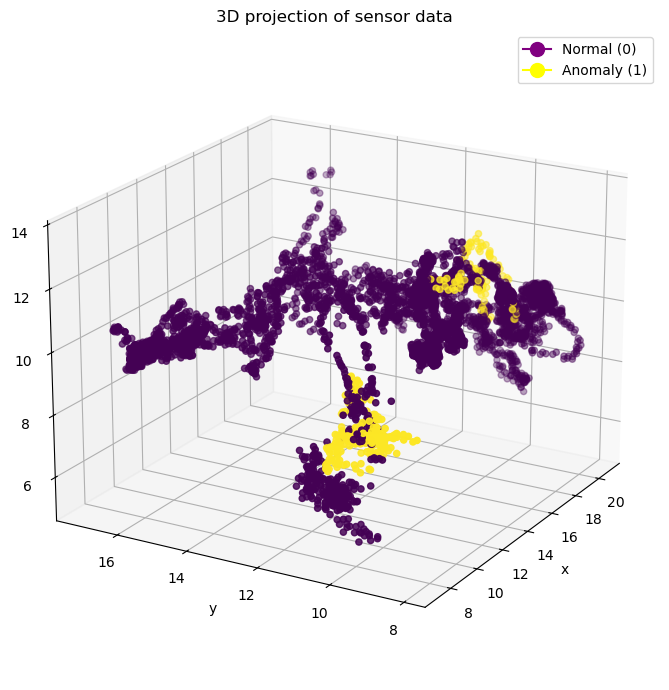

In [37]:
from matplotlib.lines import Line2D

intify = df['anomaly'].astype(int)

fig = plt.figure(figsize=(7,7), layout='tight')
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.scatter(df['x'], df['y'], df['z'], c=df['anomaly'])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel('z')
ax1.set_title('3D projection of sensor data')

legend_elements = [Line2D([0], [0], marker='o', color='purple', label='Normal (0)', 
                        markersize=10),
                   Line2D([0], [0], marker='o', color='yellow', label='Anomaly (1)', 
                        markersize=10)]

# Add the legend to the plot
ax1.legend(handles=legend_elements, loc='upper right')


ax1.view_init(elev=20., azim=-150)

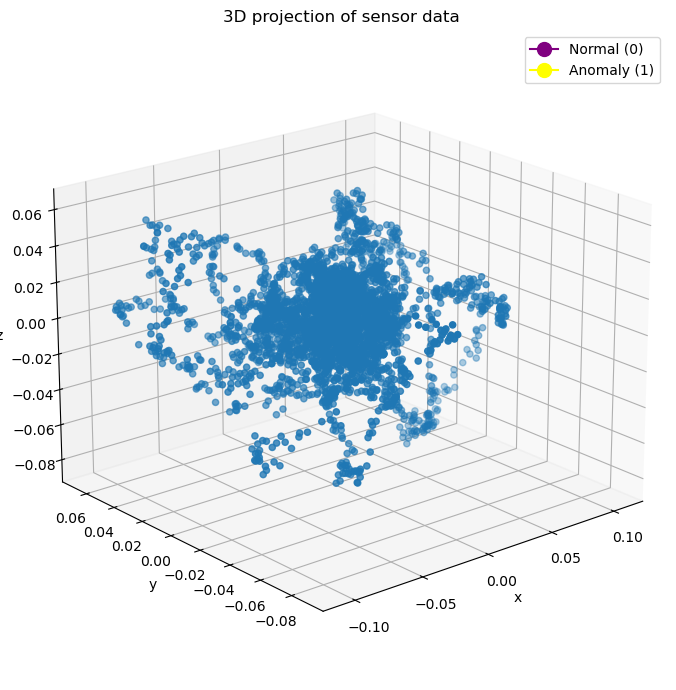

In [38]:
# using the grad of positional vectors for velocity

from matplotlib.lines import Line2D

intify = df['anomaly'].astype(int)

fig = plt.figure(figsize=(7,7), layout='tight')
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.scatter(grad_x, grad_y, grad_z)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel('z')
ax1.set_title('3D projection of sensor data')

legend_elements = [Line2D([0], [0], marker='o', color='purple', label='Normal (0)', 
                        markersize=10),
                   Line2D([0], [0], marker='o', color='yellow', label='Anomaly (1)', 
                        markersize=10)]

# Add the legend to the plot
ax1.legend(handles=legend_elements, loc='upper right')


ax1.view_init(elev=20., azim=-130)

In [39]:
# combining OH encoding for sensor data
sensor1 = np.array(df['010-000-024-033']).reshape(-1, 1)
sensor2 = np.array(df['010-000-030-096']).reshape(-1, 1)
sensor3 = np.array(df['020-000-032-221']).reshape(-1, 1)
sensor4 = np.array(df['020-000-033-111']).reshape(-1, 1)

sensor_oh = np.concatenate([sensor1, sensor2, sensor3, sensor4], axis=1)
sensor_idx = [np.argmax(i) for i in sensor_oh]


              x          y          z  010-000-024-033  010-000-030-096  \
3     19.455964  15.221361  13.124152              0.0              1.0   
10    17.980350  14.957520  12.997182              0.0              1.0   
17    17.265138  14.768522  12.313300              0.0              1.0   
24    16.390830  14.572361  11.925452              0.0              1.0   
31    15.976993  14.041489  11.239568              0.0              1.0   
...         ...        ...        ...              ...              ...   
5633  14.809317  13.542236  11.757399              0.0              1.0   
5639  15.421107  13.597581  11.852198              0.0              1.0   
5646  16.257609  13.808501  12.072418              0.0              1.0   
5653  16.788460  13.883011  12.223590              0.0              1.0   
5660  17.193080  14.024241  12.149411              0.0              1.0   

      020-000-032-221  020-000-033-111  anomaly  
3                 0.0              0.0      0.0  

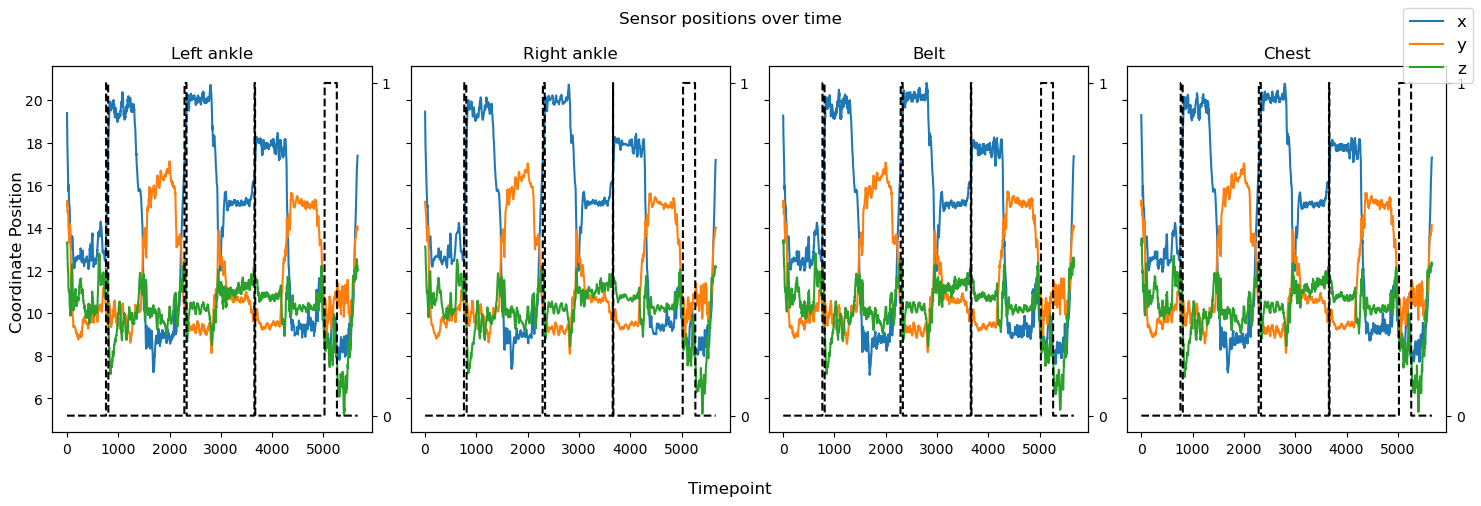

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharey=True, layout='tight')

sensor_df = [df[df['010-000-024-033'] == 1], 
                df[df['010-000-030-096'] == 1],
                df[df['020-000-032-221'] == 1],
                df[df['020-000-033-111'] == 1]]

print(df[df['010-000-030-096'] == 1])

sensor_type = ['Left ankle', 'Right ankle', 'Belt', 'Chest']

for i in range(len(sensor_df)):
    ax[i].plot(sensor_df[i]['x'], label="x")
    ax[i].plot(sensor_df[i]['y'], label="y")
    ax[i].plot(sensor_df[i]['z'], label="z")

    ax[i].set_title(f"{sensor_type[i]}")
    ax2 = ax[i].twinx()
    ax2.plot(sensor_df[i]['anomaly'], c='black', linestyle="dashed")
    ax2.set_yticks([0, 1])
fig.supxlabel("Timepoint")
fig.supylabel("Coordinate Position")
fig.suptitle("Sensor positions over time")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', prop={'size': 12})


# ax.legend()



## Aggregating user data

In [41]:
combined_list = []
for dir in os.listdir("../data/kaggle/train"):
    train_df = pd.read_csv(f"../data/kaggle/train/{dir}")
    train_df['user_id'] = dir.split('_')[1].split('.')[0]
    combined_list.append(train_df)

combined_train_df = pd.concat(combined_list)
combined_train_df = combined_train_df.rename(columns={'010-000-024-033': 'Left ankle', '010-000-030-096': 'Right ankle', '020-000-033-111': 'Chest', '020-000-032-221': 'Belt'})

print("Training anomaly counts")
print(F"{"Overall:":30} {len(combined_train_df) :10}")
print(f"{"Non-anomalous event count:":30} {combined_train_df.anomaly.value_counts()[0] :10} ")
print(f"{"Anomalous event count:":30} {combined_train_df.anomaly.value_counts()[1] :10} ")
print(f"{"Fraction train anomaly:":30} {np.round(combined_train_df.anomaly.value_counts()[1]/len(combined_train_df), 4):10}")

combined_train_df

Training anomaly counts
Overall:                           134229
Non-anomalous event count:         127656 
Anomalous event count:               6573 
Fraction train anomaly:             0.049


,x,y,z,Left ankle,Right ankle,Belt,Chest,anomaly,user_id
0,24.360715,14.661491,15.061292,0.0,0.0,0.0,1.0,0.0,2
1,24.345720,14.677384,15.080112,0.0,0.0,1.0,0.0,0.0,2
2,24.315322,14.641433,15.020421,1.0,0.0,0.0,0.0,0.0,2
3,24.305469,14.663497,15.005379,0.0,1.0,0.0,0.0,0.0,2
4,24.273169,14.633127,14.865332,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...
8864,15.086639,14.924325,12.932729,0.0,1.0,0.0,0.0,0.0,17
8865,15.223613,14.914838,13.023995,1.0,0.0,0.0,0.0,0.0,17
8866,15.256996,14.926272,13.302165,0.0,0.0,0.0,1.0,0.0,17
8867,15.318133,14.962508,12.995632,0.0,1.0,0.0,0.0,0.0,17


In [42]:
combined_list = []
for dir in os.listdir("../data/kaggle/test"):
    test_df = pd.read_csv(f"../data/kaggle/test/{dir}")
    test_df['user_id'] = dir.split('_')[1].split('.')[0]
    combined_list.append(test_df)

combined_test_df = pd.concat(combined_list)
combined_test_df = combined_test_df.rename(columns={'010-000-024-033': 'Left ankle', '010-000-030-096': 'Right ankle', '020-000-033-111': 'Chest', '020-000-032-221': 'Belt'})


print("Testing anomaly counts")
print(F"{"Overall:":30} {len(combined_test_df) :10}")
print(f"{"Non-anomalous event count:":30} {combined_test_df.anomaly.value_counts()[0] :10} ")
print(f"{"Anomalous event count:":30} {combined_test_df.anomaly.value_counts()[1] :10} ")
print(f"{"Fraction train anomaly:":30} {np.round(combined_test_df.anomaly.value_counts()[1]/len(combined_test_df), 4):10}")

combined_test_df

Testing anomaly counts
Overall:                            30030
Non-anomalous event count:          28420 
Anomalous event count:               1610 
Fraction train anomaly:            0.0536


,x,y,z,Left ankle,Right ankle,Belt,Chest,anomaly,user_id
0,6.504078,12.789729,9.447159,1.0,0.0,0.0,0.0,0.0,24
1,6.472978,12.675193,9.622985,0.0,0.0,1.0,0.0,0.0,24
2,6.452725,12.625970,9.325761,0.0,1.0,0.0,0.0,0.0,24
3,6.426322,12.610741,9.753680,0.0,0.0,0.0,1.0,0.0,24
4,6.401717,12.602613,9.780900,1.0,0.0,0.0,0.0,0.0,24
...,...,...,...,...,...,...,...,...,...
5641,8.848450,12.325300,10.712311,0.0,1.0,0.0,0.0,0.0,22
5642,8.868416,12.196157,11.130225,0.0,0.0,0.0,1.0,0.0,22
5643,8.816918,12.188862,10.833978,1.0,0.0,0.0,0.0,0.0,22
5644,8.879654,12.211562,11.045605,0.0,0.0,1.0,0.0,0.0,22


## Preprocessing data

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax_scaler = MinMaxScaler
standard_scaler = StandardScaler()

X_train = combined_train_df.iloc[:, combined_train_df.columns != 'anomaly']
y_train = combined_train_df['anomaly']

X_test = combined_test_df.iloc[:, combined_test_df.columns != 'anomaly']
y_test = combined_test_df['anomaly']

scaled_X_train = standard_scaler.fit_transform(X_train)
scaled_X_test = standard_scaler.fit_transform(X_test)
print(scaled_X_train.shape)
print(scaled_X_test.shape)

(134229, 8)
(30030, 8)


In [44]:
from sklearn.linear_model import Ridge, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

def train_model(model, model_name):
    random_states = [i for i in range(1)]

    scores = []
    models = []
    reports = []

    models_picker = {
        "random_forest": RandomForestClassifier(max_features=0.5, max_depth=15, random_state=0),
        'svc': SVC(C=1, kernel='poly', random_state=0),
        'xgboost': XGBClassifier(n_estimators=2000,  # Large number to allow early stopping
                                    learning_rate=0.1,
                                    max_depth=5,        # Tunable hyperparameter
                                    random_state=0,
                                    use_label_encoder=False, 
                                    eval_metric="logloss"),  # Prevents warnings
        'elastic': ElasticNet(),
        'logistic': LogisticRegression('l2'),
        'knc': KNeighborsClassifier(n_neighbors=10, weights='distance'),
    }

    model = models_picker[model_name]


    for random_state in random_states:
        print(f'Training model {random_state} out of {len(random_states)}')
        model = model.fit(X_train, y_train)
        pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, pred)
        report = classification_report(y_test, pred)

        scores.append(accuracy)
        reports.append(report)
        
        models.append(model)

    return scores, models, reports


results, models, reports = train_model(0, "xgboost")
results

Training model 0 out of 1


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:user_id: object

In [45]:
model_idx = 0

model = models[model_idx]
print(reports[model_idx])

test_df = pd.read_csv("./data/test/data_20.csv")
test_df = test_df.rename(columns={'010-000-024-033': 'Left ankle', '010-000-030-096': 'Right ankle', '020-000-033-111': 'Chest', '020-000-032-221': 'Belt'})

X_test = test_df.iloc[:, test_df.columns != 'anomaly']
y_test = test_df['anomaly']

preds = model.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharex=True)
ax[0].plot(X_test['x'])
ax[0].plot(X_test['y'])
ax[0].plot(X_test['z'])

ax02 = ax[0].twinx()
ax02.plot(y_test, c='red', linestyle="dashed")
ax02.set_yticks([0, 1])

ax[1].plot(X_test['x'], label='x')
ax[1].plot(X_test['y'], label='y')
ax[1].plot(X_test['z'], label='z')

ax12 = ax[1].twinx()
ax12.plot(preds, c='red', linestyle="dashed", alpha=0.7)
ax12.set_yticks([0, 1])

ax[0].set_xlabel('Timepoint')
ax[0].set_ylabel("XYZ Positional Coordinates")
ax[0].set_title('Test Set')

ax[1].set_xlabel('Timepoint')
ax[1].set_title('Predictions')
ax[1].legend(loc='upper left')
fig.suptitle('Test Data vs Predictions')

NameError: name 'models' is not defined

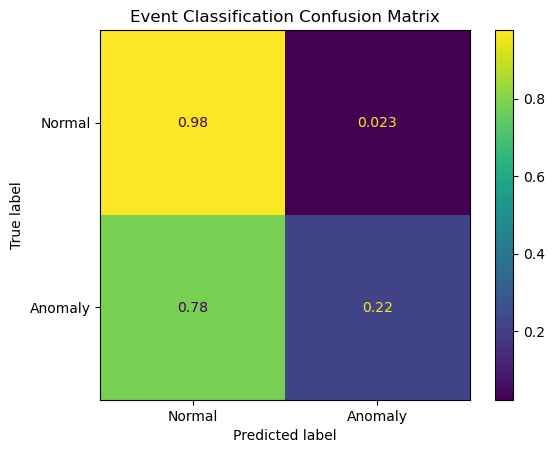

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds, normalize="true")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                    display_labels=["Normal", "Anomaly"])
disp.plot(colorbar=True)
plt.title(f"Event Classification Confusion Matrix")
plt.show()

(6623, 7)


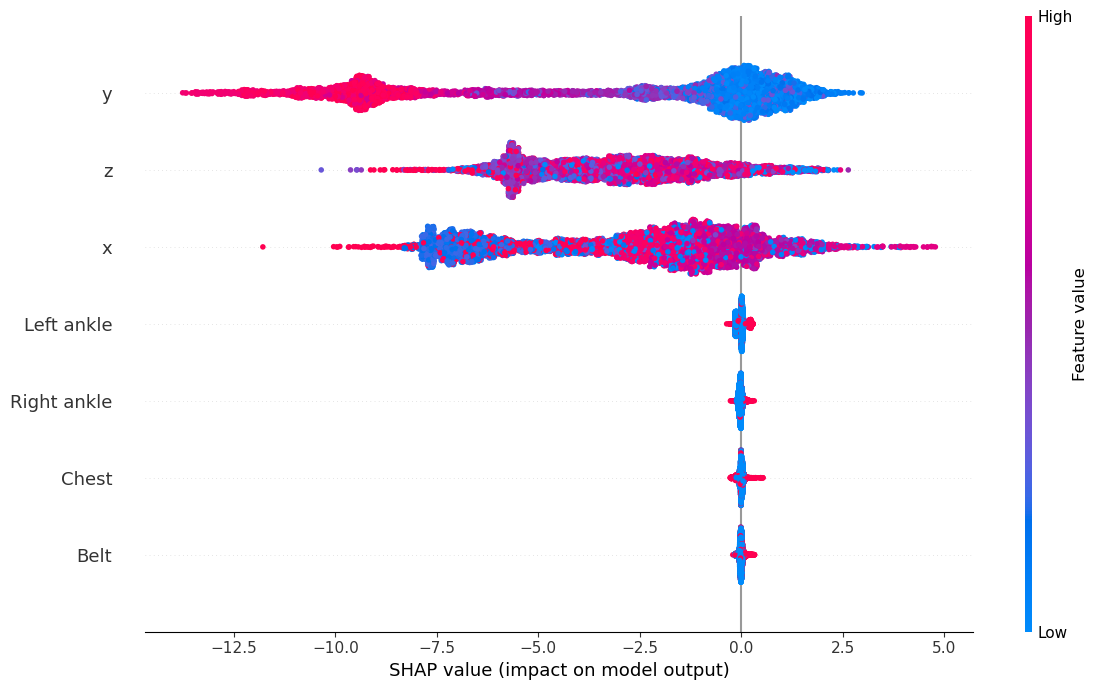

In [ ]:
import shap
# shap.initjs()
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)
print(shap_values.shape)

shap.summary_plot(shap_values, X_test, feature_names = X_test.columns, 
                    max_display=10, plot_size=[12, 7])

In [70]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score

from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit

total_df = pd.concat([combined_train_df, combined_test_df])

total_y = total_df['anomaly']
total_X = total_df.loc[:, total_df.columns != 'anomaly']
total_X['user_id'] = pd.to_numeric(total_X['user_id'])

groups = pd.to_numeric(total_df['user_id'])

print(groups.describe())
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.

    You should:

    1. Loop through 10 different random states
    2. Split your data 
    3. Fit a model using GridSearchCV with KFold and the predefined Preprocessor 
    4. Calculate the model's error on the test set 
    5. Return a list of 10 test scores and 10 best models 
    '''
    # lists to be returned 
    test_scores = []
    best_models = []

    # your code here...

    random_states = [i for i in range(5)]

    for random_state in random_states:
        print(f"Starting iteration {random_state+1}")
        
        
        # print(f"Train set shape: {X_train.shape}, test set shape: {X_test.shape}")

        # kfold = KFold(n_splits=4, shuffle=True, random_state=random_state)

        splitter = GroupShuffleSplit(n_splits=1,test_size=0.2,random_state=random_state)
        for i_other,i_test in splitter.split(total_X, total_y, groups):
            X_other, y_other, groups_other = total_X.iloc[i_other], total_y.iloc[i_other], groups.iloc[i_other]
            X_test, y_test, groups_test = total_X.iloc[i_test], total_y.iloc[i_test], groups.iloc[i_test]

        kf = GroupKFold(n_splits=3)

        pipeline = Pipeline([
            ('model', ML_algo)
        ])

        grid_search = GridSearchCV(
            estimator=pipeline, 
            param_grid=param_grid,
            scoring='recall',
            return_train_score = True,
            cv=kf,
            n_jobs=-1,
            verbose=True
        )

        grid_search.fit(X_other, y_other, groups=groups_other)

        best_model = grid_search.best_estimator_

        print(f'Best model parameters: {grid_search.best_params_}')
        print(f'Validation score: {grid_search.best_score_}')

        best_models.append(best_model)

        y_test_pred = best_model.predict(X_test)

        # print(y_test)
        # print(y_test_pred)
        test_rmse = recall_score(list(y_test), y_test_pred)

        test_scores.append(test_rmse)

    return test_scores, best_models

count    164259.000000
mean         12.172216
std           6.941010
min           0.000000
25%           6.000000
50%          13.000000
75%          18.000000
max          24.000000
Name: user_id, dtype: float64


/var/folders/s8/qqp2ns0n1zx5q35r256l57m40000gn/T/ipykernel_31362/2241750871.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_X['user_id'] = pd.to_numeric(total_X['user_id'])


In [71]:
param_grids = {
    "logistic": {"model__C": [0.1, 1, 10]},
    "rf": {
        "model__max_features": [0.25, 0.5, 1.0],
        "model__max_depth": [5, 10, 30],
    },
    "knn": {
        "model__n_neighbors": [1, 5, 10, 30],
        "model__weights": ["uniform", "distance"],
    },
    'xgboost': {
        "model__n_estimators": [100, 500, 1000, 2000],
        "model__max_depth": [3, 4, 5]
    }
}

models = {
    "xgboost": XGBClassifier(), 
    "logistic": LogisticRegression('l2'),
    "rf": RandomForestClassifier(),
    "knn": KNeighborsClassifier(),
    
}

model_scores ={}
for model in models.keys():
    test_scores, best_models = MLpipe_KFold_RMSE(X_train, y_test, 
                                                preprocessor=None, 
                                                ML_algo=models[model], 
                                                param_grid=param_grids[model])

    model_scores[model] = {'test_score': test_scores, 'best_models': best_models}


Starting iteration 1
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best model parameters: {'model__max_depth': 3, 'model__n_estimators': 2000}
Validation score: 0.2625676988810387
Starting iteration 2
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best model parameters: {'model__max_depth': 5, 'model__n_estimators': 2000}
Validation score: 0.17478375935534876
Starting iteration 3
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best model parameters: {'model__max_depth': 3, 'model__n_estimators': 2000}
Validation score: 0.18420879648224653
Starting iteration 4
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best model parameters: {'model__max_depth': 3, 'model__n_estimators': 2000}
Validation score: 0.26583755616568955
Starting iteration 5
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best model parameters: {'model__max_depth': 5, 'model__n_estimators': 2000}
Validation score: 0.10913848734292393
Starting iteration 1


/Users/kylelam/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best model parameters: {'model__C': 0.1}
Validation score: 0.012931639575183335
Starting iteration 3
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/Users/kylelam/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best model parameters: {'model__C': 0.1}
Validation score: 0.04399440253702486
Starting iteration 4
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/Users/kylelam/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kylelam/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best model parameters: {'model__C': 0.1}
Validation score: 0.005285118018108968
Starting iteration 5
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/Users/kylelam/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kylelam/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best model parameters: {'model__C': 0.1}
Validation score: 0.005067626568163686
Starting iteration 1
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best model parameters: {'model__max_depth': 30, 'model__max_features': 1.0}
Validation score: 0.17820146211872076
Starting iteration 2
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best model parameters: {'model__max_depth': 30, 'model__max_features': 1.0}
Validation score: 0.17757528495060415
Starting iteration 3
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best model parameters: {'model__max_depth': 30, 'model__max_features': 1.0}
Validation score: 0.1645751118370276
Starting iteration 4
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best model parameters: {'model__max_depth': 30, 'model__max_features': 1.0}
Validation score: 0.25280107128615864
Starting iteration 5
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best model parameters: {'model__max_depth': 30, 'model__max_

In [72]:
for model in model_scores:
    score_mean = np.mean(model_scores[model]['test_score'])
    score_std = np.std(model_scores[model]['test_score'])

    print(f'{model:15} mean score: {score_mean:20}, {model:15} std score: {score_std:20}')

xgboost         mean score:  0.17784252656583419, xgboost         std score:  0.11142267913819906
logistic        mean score: 0.010964748125709073, logistic        std score: 0.021607118131918276
rf              mean score:   0.1217636465103197, rf              std score:  0.03514416727565717
knn             mean score:   0.1624155727961189, knn             std score:  0.06109221866290278


In [ ]:
best_models

[Pipeline(steps=[('model',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, device=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=5, max_leaves=None,
                                min_child_weight=None, missing=nan,
                                monotone_constraints=None, multi_strategy=None,
                                n_es